In [1]:
import pandas as pd

In [3]:
essence = pd.read_csv('data/essence.txt')

In [4]:
essence

,conso
0,30.65
1,31.35
2,33.03
3,31.94
4,32.05
...,...
123,30.05
124,26.85
125,33.28
126,32.10


In [50]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [7]:
from math import log2

In [19]:
moyenne_emp = round(essence.conso.mean(), 2)

In [20]:
moyenne_emp

31.45

Ecart type

In [21]:
sprime = round(essence.conso.std(), 2 )

In [22]:
sprime

2.16

Variance

In [25]:
sprime2 = round(essence.conso.var(), 2 )

In [26]:
sprime2

4.66

Variance biaisée

In [30]:
v = round(sprime2*(len(essence) - 1) / len(essence), 2)

In [31]:
v

4.62

In [43]:
mu0 = 31

In [ ]:
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

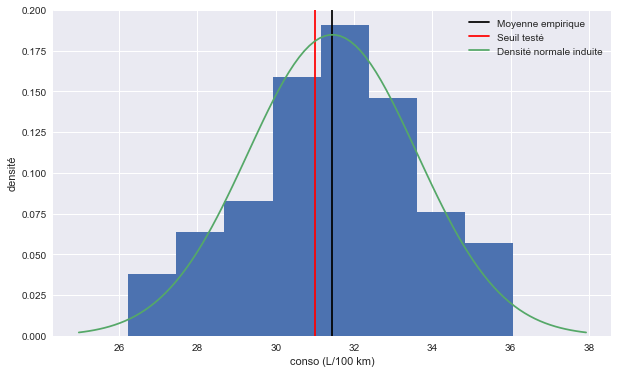

In [56]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn')
plt.hist(essence['conso'], bins= 8, density=True)
plt.axvline(x=moyenne_emp, color='black', label='Moyenne empirique')
plt.axvline(x=mu0, color='red', label='Seuil testé')
x = np.linspace(moyenne_emp - 3*sprime, moyenne_emp + 3*sprime, 100)
plt.plot(x, stats.norm.pdf(x, moyenne_emp, sprime), label='Densité normale induite')
plt.xlabel("conso (L/100 km)")
plt.ylabel("densité")
plt.legend()
plt.show

In [58]:
guerison = pd.read_csv('data/guerison.txt')

In [59]:
guerison

,guerison
0,1
1,0
2,1
3,1
4,1
...,...
211,1
212,1
213,0
214,1


## Intervalle de confiance (proportion)
### Loi normale

In [60]:
n_tot = len(guerison)
n_gueris = guerison.sum()

In [63]:
p_estim = n_gueris / n_tot

In [65]:
round(p_estim, 3)

guerison    0.773
dtype: float64

In [68]:
alpha = 0.05

In [69]:
from statsmodels.stats.proportion import proportion_confint
proportion_confint(n_gueris,n_tot, alpha=alpha, method='normal')

(guerison    0.717298
 dtype: float64,
 guerison    0.828998
 dtype: float64)

## Intervalle de confiance sur une moyenne
### Loi Strudle

In [72]:
n_essence = len(essence)

In [75]:
import scipy
import math
icinf=moyenne_emp-scipy.stats.t.ppf(1-alpha/2,n_essence-1)*sprime/math.sqrt(n_essence)
round(icinf,2)


31.07

In [76]:
icsup=moyenne_emp+scipy.stats.t.ppf(1-alpha/2,n_essence-1)*sprime/math.sqrt(n_essence)
round(icsup,2)


31.83

## Intervalle de confiance sur une Variance
### Loi du Khi2

In [78]:
icinf = (n_essence-1)*sprime2/scipy.stats.chi2.ppf(1-alpha/2,n_essence-1)
round(icinf,2)

3.7

In [79]:
icsup = (n_essence-1)*sprime2/scipy.stats.chi2.ppf(alpha/2,n_essence-1)
round(icsup,2)

6.06

# Tests

## Proportion

In [82]:
import statsmodels
statsmodels.stats.proportion.binom_test(n_gueris,n_tot, prop=0.75, alternative='larger')

array([0.2418348])